In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

## 1. Generate sample

In [2]:
p=200
def gen_sample(N):
    mean = np.zeros(p)
    cov = np.identity(p)
    X = np.random.multivariate_normal(mean, cov, N)
    beta = np.random.uniform(1,2,20)
    beta = np.concatenate((beta,np.zeros(p-20)))
    noise = np.random.normal(0,0.1,N)
    Y = np.matmul(X,beta) + noise
    return X,Y,beta

In [3]:
#list_x, list_Y will containt generated samples of size 100, 200 and 500
def gen_list_samples(list_n_samples):
    list_X, list_Y, list_beta = [], [], [] 
    for i in list_n_samples:
        X,Y,B = gen_sample(i)
        list_X.append(X) 
        list_Y.append(Y) 
        list_beta.append(B)
    return list_X,list_Y,list_beta

In [4]:
#lasso and ridge will be trained using sample generated from list_X,list_Y and list_true_beta
n_samples_lasso_ridge = [100,200,500]
list_X, list_Y, list_true_beta = gen_list_samples(n_samples_lasso_ridge)

#least squares estimator will be trained using list_X2, list_Y2, list_true_beta2
n_samples_lse = [201,500]
list_X2, list_Y2, list_true_beta2 = gen_list_samples(n_samples_lse)

In [5]:
list_X

[array([[ 0.2097088 ,  0.26152583,  0.94660041, ...,  0.42796529,
         -0.20972138, -0.36374743],
        [-0.40805184, -0.70022898, -1.47224305, ...,  1.03667045,
         -1.17954852,  0.64944988],
        [-1.16973878, -0.55707829,  0.4107229 , ..., -0.98061273,
          0.64545129,  0.58927838],
        ...,
        [-2.19078969,  0.48976131,  0.72928704, ..., -0.85556421,
         -1.34430339,  0.31085554],
        [-1.18818267, -0.39654489,  0.03420375, ...,  0.9048776 ,
         -0.43577079,  0.84637929],
        [-0.78010771,  1.01228561, -0.48479665, ...,  2.02630178,
          0.1525441 ,  1.83009548]]),
 array([[ 0.88810852,  0.75834499, -0.15757863, ...,  0.04919731,
          1.21554741,  0.9117136 ],
        [ 0.21899147,  0.47260246,  1.99018721, ..., -1.29711305,
          0.1886019 , -2.25475043],
        [-0.18059097,  0.60932163,  1.30768307, ...,  1.49663019,
         -2.56382222, -1.15919165],
        ...,
        [ 1.42976538,  0.61597958, -1.74606345, ...,  

A quick look into the generated values

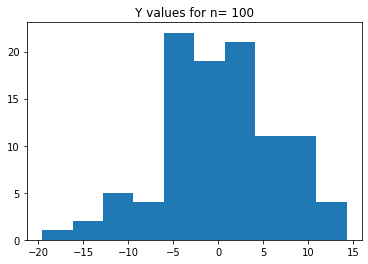

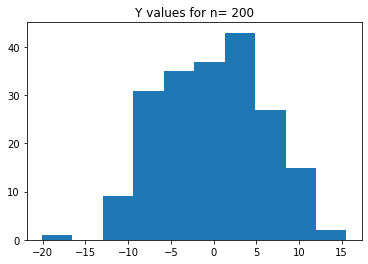

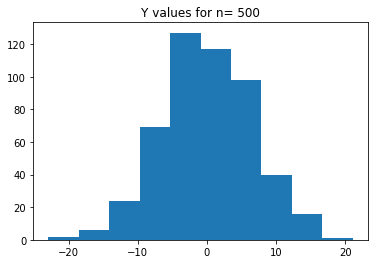

In [5]:
for y,n in zip(list_Y,n_samples_lasso_ridge):
    plt.figure()
    t = "Y values for n= "+ str(n)
    plt.title(t)
    plt.hist(y)

## 2. Implement Lasso, Ridge and Least Squares Estimators

In [6]:
LSE = lambda X,Y: np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

In [7]:
ridgeE = lambda X,Y,lam: np.matmul(np.linalg.inv(np.matmul(X.T,X) + lam*np.identity(p)),np.matmul(X.T,Y))

In [8]:
def lassoE(X,Y,lam):
    lasso_model  = linear_model.Lasso(alpha=lam)
    lasso_model.fit(X,Y)
    return lasso_model.coef_

## 3. Compute those estimators for different sample sizes

In [9]:
lassoE_list_diff_lam = []
ridgeE_list_diff_lam = []
list_lam = np.linspace(0.1,1,10) #we'll test for 10 diff values of lambda between 0.1 and 1 

#calculate lasso and ridge estimators for values in n_samples_lasso_ridge = [100,200,500]
#each one of those lists will be calculated for a same value of lambda
for l in list_lam:
    lassoE_list = [lassoE(x,y,l) for x,y in zip(list_X,list_Y)]
    lassoE_list_diff_lam.append(lassoE_list)
    ridgeE_list = [ridgeE(x,y,l) for x,y in zip(list_X, list_Y)]
    ridgeE_list_diff_lam.append(ridgeE_list)

#calculate ls estimators for values in n_samples_lse = [201,500]
lsE_list = [LSE(x,y) for x,y in zip(list_X2,list_Y2)]

#Understanding the dimensions
print("shape of lassoE_list_diff_lam and ridgeE_list_diff_lam")
print("          n=     100,   200,   500")
for list_,lam in zip(lassoE_list_diff_lam,list_lam):
    print("lambda = ",round(lam,2), "   ", end='')
    [print(i.shape,end="") for i in list_]
    print()
print()
print("shape of lsE_list")
[print(i.shape,end='') for i in lsE_list]

shape of lassoE_list_diff_lam and ridgeE_list_diff_lam
          n=     100,   200,   500
lambda =  0.1    (200,)(200,)(200,)
lambda =  0.2    (200,)(200,)(200,)
lambda =  0.3    (200,)(200,)(200,)
lambda =  0.4    (200,)(200,)(200,)
lambda =  0.5    (200,)(200,)(200,)
lambda =  0.6    (200,)(200,)(200,)
lambda =  0.7    (200,)(200,)(200,)
lambda =  0.8    (200,)(200,)(200,)
lambda =  0.9    (200,)(200,)(200,)
lambda =  1.0    (200,)(200,)(200,)

shape of lsE_list
(200,)(200,)

[None, None]

Let's analyse how many null values we get from each one of the estimators computed above:

In [10]:
#Number of zero values in lasso and ridge:
nb_zero_val_tot_lasso = []
nb_zero_val_tot_ridge = []
for i,k in zip(lassoE_list_diff_lam,ridgeE_list_diff_lam):
    nb_zero_val = [len(np.where(j  == 0)[0]) for j in i]
    nb_zero_val_tot_lasso.append(nb_zero_val)
    
    nb_zero_val2 = [len(np.where(j  == 0)[0]) for j in k]
    nb_zero_val_tot_ridge.append(nb_zero_val2)

print("Number of zero parameter values found by Lasso estimator:")
print("        n=     100,   200,   500")
for i,lam in zip(nb_zero_val_tot_lasso,list_lam):
    print("lambda = ", round(lam,1), "  ", end='')
    [print(j, "  ", end='') for j in i]
    print()

print()    

print("Number of zero parameter values found by Ridge estimator:")
print("        n=     100,   200,   500")
for i,lam in zip(nb_zero_val_tot_ridge,list_lam):
    print("lambda = ", round(lam,1), "  ", end='')
    [print(j, "  ", end='') for j in i]
    print()
    
#Number of zero values in LSE:
nb_zero_val_lse = [len(np.where(j  == 0)[0]) for j in lsE_list]

print("\n\nNumber of zero parameter values found by LS estimator:")
print("n=  201,   500")
print("      ",end='')
[print(j, "  ", end='') for j in nb_zero_val_lse]

Number of zero parameter values found by Lasso estimator:
        n=     100,   200,   500
lambda =  0.1   173   179   180   
lambda =  0.2   174   179   180   
lambda =  0.3   174   179   180   
lambda =  0.4   174   179   180   
lambda =  0.5   175   179   180   
lambda =  0.6   177   179   180   
lambda =  0.7   179   180   180   
lambda =  0.8   181   181   180   
lambda =  0.9   183   185   180   
lambda =  1.0   184   187   182   

Number of zero parameter values found by Ridge estimator:
        n=     100,   200,   500
lambda =  0.1   0   0   0   
lambda =  0.2   0   0   0   
lambda =  0.3   0   0   0   
lambda =  0.4   0   0   0   
lambda =  0.5   0   0   0   
lambda =  0.6   0   0   0   
lambda =  0.7   0   0   0   
lambda =  0.8   0   0   0   
lambda =  0.9   0   0   0   
lambda =  1.0   0   0   0   


Number of zero parameter values found by LS estimator:
n=  201,   500
      0   0   

[None, None]

Here we se that the number of zero values in Lasso estimator is aproximetly 180, which is coherent with the sparse true estimator used for generating the samples. On the other hand, for least squares and ridge there is no zero coefficient, what makes sense since they are not sparse estimators.

How to assess the quality of those estimators? Maybe we can compare the error between the true values of $\beta$ and the ones obtained by each one of the estimators.\
The true values of $\beta$ for the lasso and ridge estimators are contained in the $list\_true\_beta$ while the true values for the LSE are contained in $list\_true\_beta2$. \
For each estimator and for one of the different samples sizes we will compute the distance $||\beta_{true}-\beta_{est}||^2$

In [11]:
#lasso error for samples of size 100, 200 and 500, calculated for different values of lambda
lasso_err_list_diff_lam = []
for lassoE_list_cte_lam in lassoE_list_diff_lam:
    lasso_err_list = [np.dot(beta_true-beta_est, beta_true-beta_est)/len(beta_true) for beta_true,beta_est in zip(list_true_beta,lassoE_list_cte_lam) ]
    lasso_err_list_diff_lam.append(lasso_err_list)


#ridge error for samples of size 100, 200 and 500, calculated for different values of lambda
ridge_err_list_diff_lam = []
for ridgeE_list_cte_lam in ridgeE_list_diff_lam:
    ridge_err_list = [np.dot(beta_true-beta_est, beta_true-beta_est)/len(beta_true) for beta_true,beta_est in zip(list_true_beta,ridgeE_list_cte_lam) ]
    ridge_err_list_diff_lam.append(ridge_err_list)


#ls error for samples of size 201 and 500
lse_err_list = [np.dot(beta_true-beta_est, beta_true-beta_est)/len(beta_true) for beta_true,beta_est in zip(list_true_beta2,lsE_list) ]




#Understanding the matrices
print("|beta-beta_pred|^2 error\n")
print("Lasso error")
print("                  n=100,    n=200,     n=500")
for list_,lam in zip(lasso_err_list_diff_lam,list_lam):
    print("lambda = ",round(lam,2), "   ", end='')
    [print("%02f" % round(i,4),"  ",end='') for i in list_]
    print()
print()


print("Ridge error")
print("                  n=100,     n=200,      n=500")
for list_,lam in zip(ridge_err_list_diff_lam,list_lam):
    print("lambda = ",round(lam,2), "   ", end='')
    [print("%02f" % round(i,4),"  ",end='') for i in list_]
    print()
print()

print("LS error")
print("n=201    n= 500")
[print(round(i,4), "     ",end='') for i in lse_err_list]



|beta-beta_pred|^2 error

Lasso error
                  n=100,    n=200,     n=500
lambda =  0.1    0.002900   0.002000   0.001200   
lambda =  0.2    0.011600   0.008000   0.004600   
lambda =  0.3    0.026100   0.017900   0.010300   
lambda =  0.4    0.046500   0.031800   0.018300   
lambda =  0.5    0.071800   0.049700   0.028600   
lambda =  0.6    0.092000   0.071500   0.041100   
lambda =  0.7    0.107200   0.095700   0.055900   
lambda =  0.8    0.124100   0.121300   0.073000   
lambda =  0.9    0.140900   0.140900   0.092300   
lambda =  1.0    0.154700   0.158500   0.110900   

Ridge error
                  n=100,     n=200,      n=500
lambda =  0.1    0.116600   0.005400   0.000000   
lambda =  0.2    0.116600   0.007500   0.000000   
lambda =  0.3    0.116700   0.008900   0.000000   
lambda =  0.4    0.116700   0.010100   0.000000   
lambda =  0.5    0.116700   0.011000   0.000000   
lambda =  0.6    0.116700   0.011800   0.000000   
lambda =  0.7    0.116700   0.012500   0.

[None, None]

By the above we may conclude that while the lasso estimator seems to have errors of the same order of magnitude within a constant value of lambda, the ridge estimator's error assumes a nearly constant behavior within the sample size.\
Furthermore we can see that the ridge estimator has poor performance when the sample size is small (less than the size of the sample) and really good performance for bigger sample's size. \
We can also see that the parameter's error obtained by the least square estimator is about the same order of magnitude of ridge estimator for no shrinkage (lambda=1) when comparing the same size samples.\
We also see that the lowests errors are obtained for large samples with leasts squares and ridge estimators.

## 3. Generate new sample with n=1000 and calculate empirical risk

#### Compute prediction using the parameters found by each one of the estimators using different sample sizes (and for lasso and ridge using different values of lambda).

In [12]:
X,Y_true,beta_true = gen_sample(1000)

# y is given simply by Y=X*beta.

#we compute each column of Y considering differents values of beta (obtained for a diff lambda) 
#              within a constant same sample size. 

#lasso
Y_pred_lasso_diff_lam = []
for beta_cte_lam in lassoE_list_diff_lam:
    Y_pred_cte_lam = [np.matmul(X,beta) for beta in beta_cte_lam ]
    Y_pred_lasso_diff_lam.append(Y_pred_cte_lam)


#ridge
Y_pred_ridge_diff_lam = []
for beta_cte_lam in ridgeE_list_diff_lam:
    Y_pred_cte_lam = [np.matmul(X,beta) for beta in beta_cte_lam ]
    Y_pred_ridge_diff_lam.append(Y_pred_cte_lam)

#least squares
Y_pred_lse = [np.matmul(X,beta) for beta in lsE_list]


### Calculate empirical risk wrt mean square loss

In [13]:
#lasso MSE
pred_err_lasso_diff_lam = []
for y_cte_lam in Y_pred_lasso_diff_lam:
    pred_err_cte_lam = [np.dot(Y_true-y_pred,Y_true-y_pred)/len(Y_true) for y_pred in y_cte_lam]
    pred_err_lasso_diff_lam.append(pred_err_cte_lam)

#ridge MSE
pred_err_ridge_diff_lam = []
for y_cte_lam in Y_pred_ridge_diff_lam:
    pred_err_cte_lam = [np.dot(Y_true-y_pred,Y_true-y_pred)/len(Y_true) for y_pred in y_cte_lam]
    pred_err_ridge_diff_lam.append(pred_err_cte_lam)

#LS MSE
pred_err_lse = [np.dot(Y_true-y_pred,Y_true-y_pred)/len(Y_true) for y_pred in Y_pred_lse]

Let's now visualize those errors:

In [15]:
#Visualization:

#get coordinates:
nsamples_coor = np.repeat([[100,200,500]],10,axis=0).ravel() 
lam_coor = np.repeat([list_lam],[3])

pred_coor_lasso = np.array(pred_err_lasso_diff_lam).ravel()
pred_coor_ridge = np.array(pred_err_ridge_diff_lam).ravel()

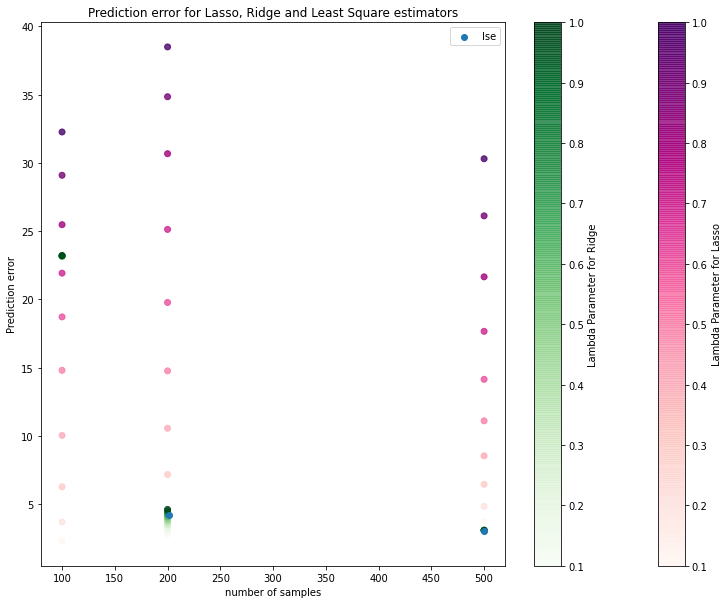

In [16]:
#figure
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('number of samples')
ax1.set_ylabel('Prediction error')
ax1.set_title('Prediction error for Lasso, Ridge and Least Square estimators')

#c sequence
# c = wine_df['Color intensity']
c= lam_coor

#plot
plt.scatter( nsamples_coor, pred_coor_lasso , c=c, 
            cmap = 'RdPu', alpha =0.8)
cbar = plt.colorbar()
cbar.set_label('Lambda Parameter for Lasso')
plt.scatter( nsamples_coor, pred_coor_ridge , c=c, 
            cmap = 'Greens', alpha =0.8)
cbar = plt.colorbar()
cbar.set_label('Lambda Parameter for Ridge')
ls_plot = plt.scatter([201,500], pred_err_lse)
plt.legend([ls_plot], ["lse"])

By the above we may conclude that the lasso prediction error presents high variability within a same size of sample when considering different values of lambda. We also can notice a clear tendency of highest values of error for highest values of lambda (this meaning that "over shrinking" the set of variables makes the risk increases).\
For the ridge prediction error we can observe that it presents nearly no variability for different values of lambda, but instead it varies within the size of samples, assuming a decreasing behavior in when the size samples increase.\
For the LSE we see that the error is more or less constant for the different sizes of samples computed.

### 5. Select a model using CV and AIC for Lasso and Ridge

In [17]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC, Ridge, RidgeCV

EPSILON = 1e-4 # This is to avoid division by zero while doing np.log10

def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='lambda: %s estimate' % name)
    plt.xlabel(r'$\lambda$')
    plt.ylabel('criterion')


Lambda choosen by AIC for Lasso:  0.00035993801369900246


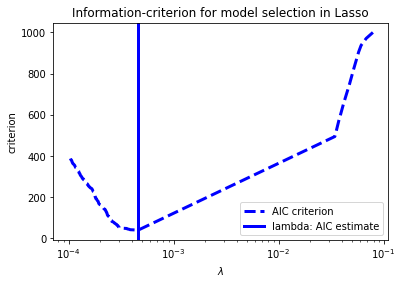

In [18]:
# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))


# LassoLarsIC: least angle regression with AIC criterion
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, Y_true)
alpha_aic_ = model_aic.alpha_

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plt.legend()
plt.title('Information-criterion for model selection in Lasso')

print("Lambda choosen by AIC for Lasso: ", model_aic.alpha_)

Here we can see the choice of the AIC criterion of $\lambda \approx 0.00036$ which corresponds to a nearly complete solution (having in mind that for $\lambda = 0$ we should have the leasts square solution). By the prevoius prediction error graph we can see that indeed the predicton error for the lasso is lower for lower vales of $\lambda$. However that confirms the tendency of the AIC in choosing too complex models, since it doesn't penalizes the dimension of the model as much as it penalizes the bias.

Computing regularization path using the Lars lasso...


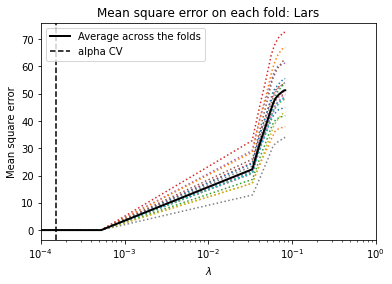

Lambda choosen by CV for Lasso:  0.000150664101565865


In [19]:
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
# t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, Y_true)
# t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\lambda$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars')
plt.axis('tight')
plt.xlim(0.0001, 1)

plt.show()
print("Lambda choosen by CV for Lasso: ", model.alpha_)
best_lam_lasso=model.alpha_

We can see that the shrinkage is indeed weaker than the one proposed by AIC, which results in a less complex model when compared to the one selected by AIC.

As I could not find a good library to selec the hyperparameter for Ridge as the above for Lasso, I'll do a different method for its cross validation, considering 20 folds repeating this whole process for different values of $\lambda$ and getting the average score at the end. The model with highest average score will be the selected one.

In [20]:
lam_list = np.linspace(0.01,20,100)
scores=[]
for l in lam_list:
    model = Ridge(alpha=lam)
    scores_ridge = cross_val_score(model, X, Y_true, scoring='neg_mean_squared_error', cv=20)
    scores.append(scores_ridge)

In [24]:
mean_scores_ridge = [np.mean(i) for i in scores]
best_lam_ridge = lam_list[mean_scores_ridge.index(max(mean_scores_ridge))]
print("The highest score for Ridge CV was obtained for lambda = ", best_lam_ridge )

The highest score for Ridge CV was obtained for lambda =  0.01


Now we can compute again the models for each one of the values of the parameters used in order to compute the MSE again:

Let's generate new training samples of size [100,200,500],test sample of size 1000 and assess its prediction error (mean squared error):

In [22]:
from sklearn.metrics import mean_squared_error

X_test,Y_test,beta2 = gen_sample(1000)

mse_lasso_n=[]
mse_ridge_n=[]
for n in n_samples_lasso_ridge:
    X_train,Y_train,beta=gen_sample(n)

    #fitting the model
    beta_lasso=lassoE(X_train,Y_train,best_lam_lasso)
    beta_ridge=ridgeE(X_train,Y_train,best_lam_ridge)

    #predictions
    y_pred_lasso = np.matmul(X_test,beta_lasso)
    y_pred_ridge = np.matmul(X_test,beta_ridge)

    mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
    mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
    
    mse_lasso_n.append(mse_lasso)
    mse_ridge_n.append(mse_ridge)

print("Lasso error")
[print("n = ",n,"  ",i) for i,n in zip(mse_lasso_n,n_samples_lasso_ridge)]
print("Ridge error")
[print("n = ",n,"  ",i) for i,n in zip(mse_ridge_n,n_samples_lasso_ridge)]
print("LSE error")
[print("n = ",n,"  ",i) for i,n in zip(pred_err_lse,n_samples_lse)]

Lasso error
n =  100    4.456140983829542
n =  200    3.617951184294756
n =  500    3.902259869452561
Ridge error
n =  100    23.467647722251225
n =  200    4.788513440236355
n =  500    3.903366393963237
LSE error
n =  201    4.195303047653955
n =  500    3.0346890036417635


[None, None]

We can say that the least square is the estimator that has more constant behavior. Ridge estimator shows fast error decreasing within the samples size.
\
If we had small sample sizes probably ridge would not be a good estimator, while LSE seems to present less variance with respect to the amount of data.

For small samples (N<p) I would choose LSE, and for biggest sample sizes the choise between Lasso and Ridge is still not clear.

### Boxplots

We can now estimate the each collection of model behaves within a same size dataset.

Text(0.5, 0, 'number of samples')

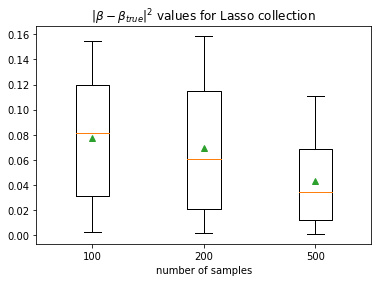

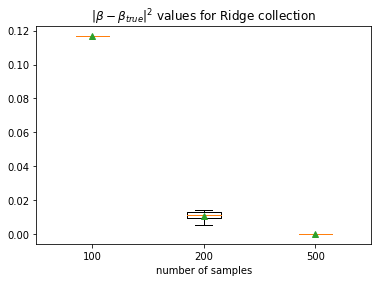

In [23]:
lasso_box = [np.array(lasso_err_list_diff_lam).T[i] for i in range(0,3)]
plt.boxplot(lasso_box, labels=[str(r) for r in n_samples_lasso_ridge], showmeans=True)
plt.title(r"$|\beta-\beta_{true}|^{2}$ values for Lasso collection")
plt.xlabel("number of samples")
plt.figure()
ridge_box = [np.array(ridge_err_list_diff_lam).T[i] for i in range(0,3)]
plt.boxplot(ridge_box, labels=[str(r) for r in n_samples_lasso_ridge], showmeans=True)
plt.title(r"$|\beta-\beta_{true}|^{2}$ values for Ridge collection")
plt.xlabel("number of samples")

By the above we may conclude the following:\
Lasso estimator seems to assume, in average, a nearly steady error within different samples sizes (used to obtain the estimated betas). On the other hand, when comparing the models from a same collection (trained within the same sample size, but admitting different values of $lambda$), the lasso error presents high variance. \
Ridge, by contrast, seems to show almost no variance between the models of a same-sized sample, but it does demonstrate high variance with respect to different sample sizes used to train the collection of models.
We may state that Lasso seems to be much more sensible to the choice of the $\lambda$ parameter, while Ridge seems to be much more sensible to the sample size used to fit those.
